In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import preprocessing
import random
import tensorflow as tf

In [ ]:
len(os.listdir(path+"/preprocessed_images"))

6392

In [ ]:
df = pd.read_csv(path+"/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/3446_left.jpg


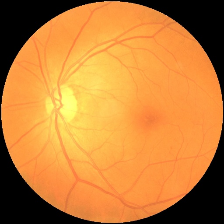

drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/4271_right.jpg


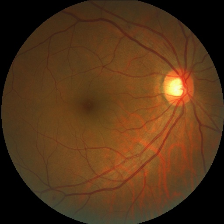

drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/1118_right.jpg


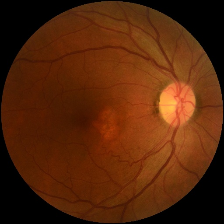

drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/1600_right.jpg


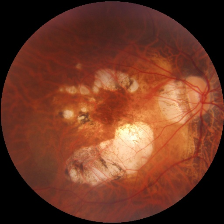

drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/1867_left.jpg


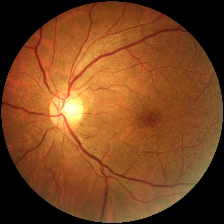

drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/2126_right.jpg


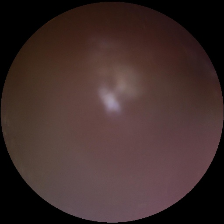

drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/889_left.jpg


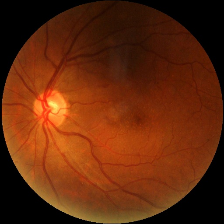

drive/My Drive/TechSavvy - Retinal disorder predictor/Dataset/preprocessed_images/1238_right.jpg


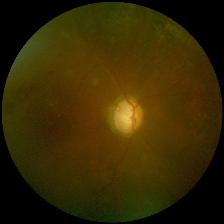

In [ ]:
from google.colab.patches import cv2_imshow
image_size = 224
for Class in df['labels'].unique():
    seg = df[df['labels']==Class]
    address = seg.sample().iloc[0]['filename']
    dataset_dir = path+"/preprocessed_images/"
    print(dataset_dir+ address)
    img = cv2.imread(dataset_dir+ address)
    img = cv2.resize(img, (image_size, image_size))
    cv2_imshow(img)

In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
left_cataract_imgs = []
right_cataract_imgs = []
for i in range(len(df)):
    if df["left_cataract"][i] == 1:
        left_cataract_imgs.append(df['Left-Fundus'][i])
    if df["right_cataract"][i] == 1:
        right_cataract_imgs.append(df['Right-Fundus'][i])

In [ ]:
print(len(left_cataract_imgs))
print(len(right_cataract_imgs))

304
290


In [ ]:
def is_normal(text):
    if "normal fundus" in text:
        return 1
    else:
        return 0


In [ ]:
df["left_normal"] = df["Left-Diagnostic Keywords"].apply(lambda x: is_normal(x))
df["right_normal"] = df["Right-Diagnostic Keywords"].apply(lambda x: is_normal(x))

In [ ]:
left_normal_imgs = []
right_normal_imgs = []
for i in range(len(df)):
    if df["left_normal"][i] == 1:
        left_normal_imgs.append(df['Left-Fundus'][i])
    if df["right_normal"][i] == 1:
        right_normal_imgs.append(df['Right-Fundus'][i])

In [ ]:
print(len(left_normal_imgs))
print(len(right_normal_imgs))

2898
2777


In [ ]:
import random
left_normal_imgs = random.sample(left_normal_imgs, 304)
right_normal_imgs = random.sample(right_normal_imgs, 290)

In [ ]:
print(len(left_normal_imgs))
print(len(right_normal_imgs))

304
290


In [ ]:
cataract = np.concatenate((left_cataract_imgs,right_cataract_imgs),axis=0)
normal = np.concatenate((left_normal_imgs,right_normal_imgs),axis=0)

In [ ]:
print(len(cataract),len(normal))

594 594


In [ ]:
images_dir = path+"/preprocessed_images/"
image_size = 224
dataset = []
def create_dataset(image_category,label):
    for img in image_category:
        image_path = os.path.join(images_dir,img)
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset
dataset = create_dataset(cataract,1)
dataset = create_dataset(normal,0)

In [ ]:
len(dataset)

1174

In [ ]:
X = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
Y = np.array([i[1] for i in dataset])

In [ ]:
X.shape, Y.shape

((1174, 224, 224, 3), (1174,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
X_val = X_train[-50:]
Y_val = Y_train[-50:]
X_train = X_train[:-50]
Y_train = Y_train[:-50]

In [ ]:
print(f"X_train Shape: {X_train.shape}, Y_train Shape: {Y_train.shape}")
print(f"X_val Shape: {X_val.shape}, Y_val Shape: {Y_val.shape}")
print(f"X_test Shape: {X_test.shape}, Y_test Shape: {Y_test.shape}")

X_train Shape: (830, 224, 224, 3), Y_train Shape: (830,)
X_val Shape: (50, 224, 224, 3), Y_val Shape: (50,)
X_test Shape: (294, 224, 224, 3), Y_test Shape: (294,)


In [ ]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0, DenseNet121, VGG19, MobileNetV2, Xception, NASNetMobile, InceptionResNetV2
resnet = ResNet50(weights="imagenet", include_top = False, input_shape=(image_size,image_size,3))
efficientnet = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
densenet = DenseNet121(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
mobilenetv2 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
xception = Xception(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
nasnet_mobile = NASNetMobile(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
inceptionresnet_model = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))

219055592/219055592 [==============================] - 2s 0us/step


In [ ]:
architectures = [ResNet50, EfficientNetB0, DenseNet121, VGG19, MobileNetV2, Xception, NASNetMobile, InceptionResNetV2]
for architecture in architectures:
  model = architecture(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
  for layer in model.layers:
      layer.trainable = False

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Flatten,Dense
# model = Sequential()
# model.add(resnet)
# model.add(Flatten())
# model.add(Dense(2,activation="softmax"))


In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
Total params: 23788418 (90.75 MB)
Trainable params: 200706 (784.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss",patience=7, verbose=1)
callbacks = [early_stopping]

In [ ]:
architectures = [
    (ResNet50, "ResNet50"),
    (EfficientNetB0, "EfficientNetB0"),
    (DenseNet121, "DenseNet121"),
    (VGG19, "VGG19"),
    (MobileNetV2, "MobileNetV2"),
    (Xception, "Xception"),
    (NASNetMobile, "NASNetMobile"),
    (InceptionResNetV2, "InceptionResNetV2")
]

results = {}

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
for model_class, model_name in architectures:
    print(f"Training and evaluating {model_name}...")
    model = model_class(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
    model = tf.keras.Sequential([
    model,
    Flatten(),
    Dense(2, activation="softmax")
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=SparseCategoricalCrossentropy(from_logits=False),
        metrics=["accuracy"]
    )

    history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_val, Y_val), verbose=1, callbacks=callbacks)

    test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=8)

    print(f"Test Accuracy for {model_name}: {test_accuracy:.4f}\n")

Training and evaluating ResNet50...
Epoch 1/50
26/26 [==============================] - 54s 506ms/step - loss: 3.2994 - accuracy: 0.8470 - val_loss: 10952748.0000 - val_accuracy: 0.4800
Epoch 2/50
26/26 [==============================] - 9s 330ms/step - loss: 0.8383 - accuracy: 0.8711 - val_loss: 86383736.0000 - val_accuracy: 0.4600
Epoch 3/50
26/26 [==============================] - 9s 335ms/step - loss: 0.4047 - accuracy: 0.8831 - val_loss: 1422823.3750 - val_accuracy: 0.4600
Epoch 4/50
26/26 [==============================] - 9s 338ms/step - loss: 2.7830 - accuracy: 0.8711 - val_loss: 206341440.0000 - val_accuracy: 0.4600
Epoch 5/50
26/26 [==============================] - 9s 332ms/step - loss: 0.3310 - accuracy: 0.8771 - val_loss: 1824194.8750 - val_accuracy: 0.4600
Epoch 6/50
26/26 [==============================] - 9s 331ms/step - loss: 0.2823 - accuracy: 0.8892 - val_loss: 49913.6250 - val_accuracy: 0.5000
Epoch 7/50
26/26 [==============================] - 8s 323ms/step - loss:

In [ ]:
# hist = model.fit(X_train,Y_train, batch_size=32, epochs=50, validation_data=(X_val, Y_val),verbose=1,callbacks=callbacks)

Epoch 1/50
26/26 [==============================] - 15s 181ms/step - loss: 2.4547 - accuracy: 0.8845 - val_loss: 1.2568 - val_accuracy: 0.9200
Epoch 2/50
26/26 [==============================] - 2s 96ms/step - loss: 0.3525 - accuracy: 0.9603 - val_loss: 0.6096 - val_accuracy: 0.9600
Epoch 3/50
26/26 [==============================] - 2s 96ms/step - loss: 0.2984 - accuracy: 0.9711 - val_loss: 0.2662 - val_accuracy: 0.9800
Epoch 4/50
26/26 [==============================] - 2s 96ms/step - loss: 0.0504 - accuracy: 0.9928 - val_loss: 0.2867 - val_accuracy: 0.9400
Epoch 5/50
26/26 [==============================] - 3s 105ms/step - loss: 0.0198 - accuracy: 0.9976 - val_loss: 0.0957 - val_accuracy: 0.9800
Epoch 6/50
26/26 [==============================] - 3s 101ms/step - loss: 2.7902e-04 - accuracy: 1.0000 - val_loss: 0.2287 - val_accuracy: 0.9600
Epoch 7/50
26/26 [==============================] - 3s 100ms/step - loss: 4.1325e-06 - accuracy: 1.0000 - val_loss: 0.2755 - val_accuracy: 0.9600


In [ ]:
# hist.history

{'loss': [2.454711675643921,
  0.35254085063934326,
  0.2983890771865845,
  0.050370924174785614,
  0.01976519450545311,
  0.00027902264264412224,
  4.1325333768327255e-06,
  3.80199571736739e-06,
  3.0061162306083133e-06,
  2.512986839064979e-06,
  2.140327751476434e-06,
  1.9175677152816206e-06],
 'accuracy': [0.8844765424728394,
  0.9602888226509094,
  0.9711191058158875,
  0.9927797913551331,
  0.9975932836532593,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.2567753791809082,
  0.6095728874206543,
  0.2662295997142792,
  0.2866949737071991,
  0.09572400897741318,
  0.22871465981006622,
  0.27553316950798035,
  0.27499428391456604,
  0.27120673656463623,
  0.26786112785339355,
  0.2664188742637634,
  0.2637336254119873],
 'val_accuracy': [0.9200000166893005,
  0.9599999785423279,
  0.9800000190734863,
  0.9399999976158142,
  0.9800000190734863,
  0.9599999785423279,
  0.9599999785423279,
  0.9599999785423279,
  0.9599999785423279,
  0.9599999785423279,
  0.95999

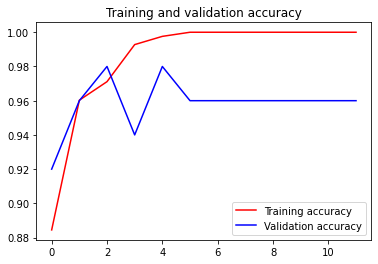

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

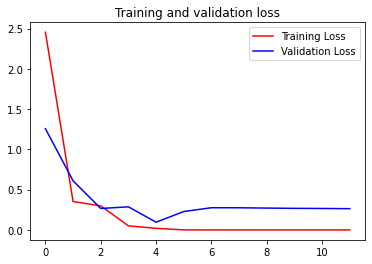

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

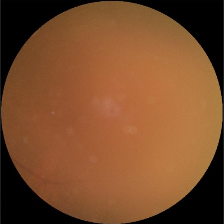

1/1 [==============================] - 0s 48ms/step
predicted label: 1
[[2.2300013e-37 1.0000000e+00]]


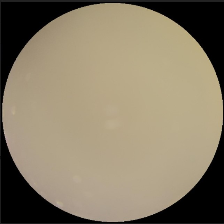

1/1 [==============================] - 0s 44ms/step
predicted label: 1
[[1.9264898e-32 1.0000000e+00]]


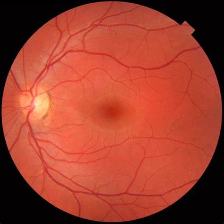

1/1 [==============================] - 0s 40ms/step
predicted label: 0
[[1.000000e+00 6.620888e-35]]


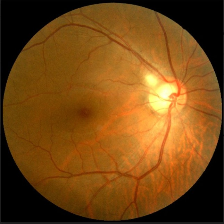

1/1 [==============================] - 0s 44ms/step
predicted label: 0
[[1.0000000e+00 1.0613787e-18]]


In [ ]:
from google.colab.patches import cv2_imshow
for name in ["c3", "c4", "n1", "n2"]:
  img = cv2.imread(f"{name}.jpg")
  img = cv2.resize(img,(image_size,image_size))
  cv2_imshow(img)
  import numpy as np
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  batch_prediction = model.predict(img_array)

  print("predicted label:",np.argmax(batch_prediction[0]))
  print(batch_prediction)

In [ ]:
model.evaluate(X_test, Y_test, batch_size=8)

37/37 [==============================] - 11s 45ms/step - loss: 1.0907 - accuracy: 0.5068


[1.090736985206604, 0.5068027377128601]

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.array([np.argmax(i) for i in y_pred])
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

10/10 [==============================] - 1s 90ms/step


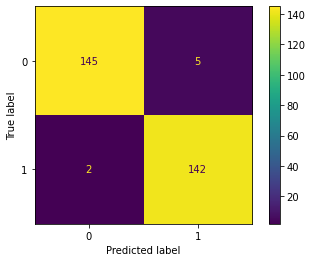

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test, y_pred))
accuracy_score(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.97      0.99      0.98       144

    accuracy                           0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294



0.9761904761904762

In [ ]:
model.save("resnet_model.hdf5")